In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
filelist = [fc.sr.NMSSM_MX_700_MY_400,fc.sr.QCD_B_List+[fc.sr.TTJets]]
trees = [ Tree(fnames) for fnames in filelist ]

In [3]:
print_bovers(trees)

Bkg/Signal: 38.42
=== File Info ===
File: ['/eos/uscms/store/user/ekoenig/6BAnalysis/NTuples/2018/SR/NMSSM/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root']
Total Events:    [1075746.0]
Raw Events:      [454121]
Selected Events: 454121
=== File Info ===
File: ['/eos/uscms/store/user/ekoenig/6BAnalysis/NTuples/2018/SR/QCD/QCD_bEnriched_HT200to300_TuneCP5_13TeV-madgraph-pythia8/ntuple.root', '/eos/uscms/store/user/ekoenig/6BAnalysis/NTuples/2018/SR/QCD/QCD_bEnriched_HT300to500_TuneCP5_13TeV-madgraph-pythia8/ntuple.root', '/eos/uscms/store/user/ekoenig/6BAnalysis/NTuples/2018/SR/QCD/QCD_bEnriched_HT500to700_TuneCP5_13TeV-madgraph-pythia8/ntuple.root', '/eos/uscms/store/user/ekoenig/6BAnalysis/NTuples/2018/SR/QCD/QCD_bEnriched_HT700to1000_TuneCP5_13TeV-madgraph-pythia8/ntuple.root', '/eos/uscms/store/user/ekoenig/6BAnalysis/NTuples/2018/SR/QCD/QCD_bEnriched_HT1000to1500_TuneCP5_13TeV-madgraph-pythia8/ntuple.root', '/eos/uscms/store/user/ekoenig/6BAnalysis/NTuples/2018/SR/QCD/QCD_bEnriched_HT1

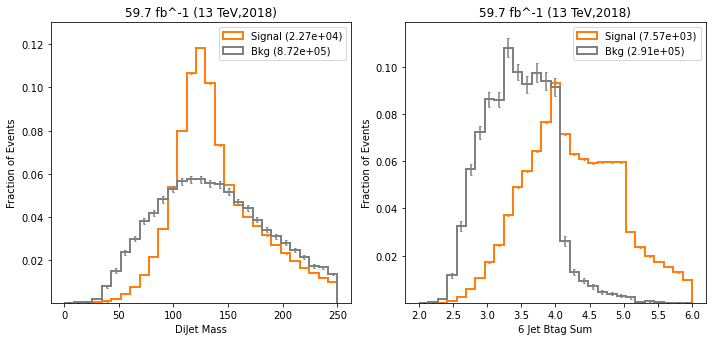

In [4]:
study.quick(trees,varlist=["higgs_m","jet6_btagsum"],saveas="baseline_norm",density=1)

In [5]:
higgs_mass_cr = lambda tree : Selection(tree,mask=ak.all(np.abs(tree["higgs_m"]-125)>30,axis=-1))
selection_hm_cr = [ higgs_mass_cr(tree) for tree in trees ]

In [6]:
print_bovers(selection_hm_cr)

Bkg/Signal: 59.46
--- all Signal ---
Event Efficiency:   0.23
Selected Purity(6): 0.21
Passed Jet S/T:     0.68
--- all Bkg ---
Event Efficiency:   0.29
------


In [7]:
best_cut = optimize_var_cut(selection_hm_cr,"jet6_btagsum",method=min)
print(best_cut)

Optimization terminated successfully.
         Current function value: -102.014399
         Iterations: 17
         Function evaluations: 37
[3.82470689]


In [8]:
hm_cr_btagsum = [ selection.masked( selection.get("jet6_btagsum") < 3.8 ) for selection in selection_hm_cr ]

In [9]:
print_bovers(hm_cr_btagsum)

Bkg/Signal: 134.10
--- all Signal ---
Event Efficiency:   0.075
Selected Purity(6): 0.11
Passed Jet S/T:     0.66
--- all Bkg ---
Event Efficiency:   0.23
------


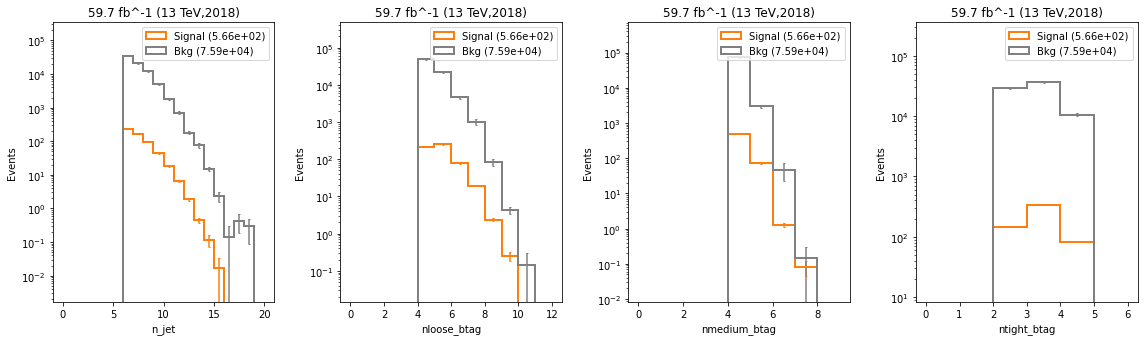

In [10]:
study.njets(hm_cr_btagsum,log=1,saveas="hm_btagsum_cr")

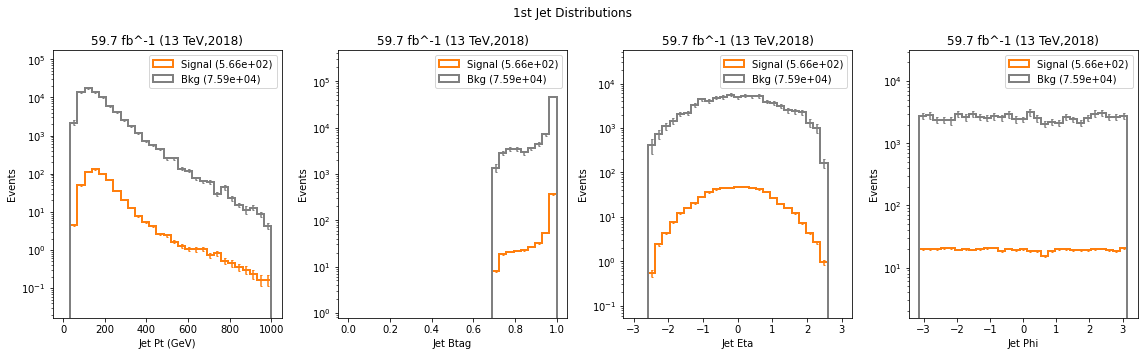

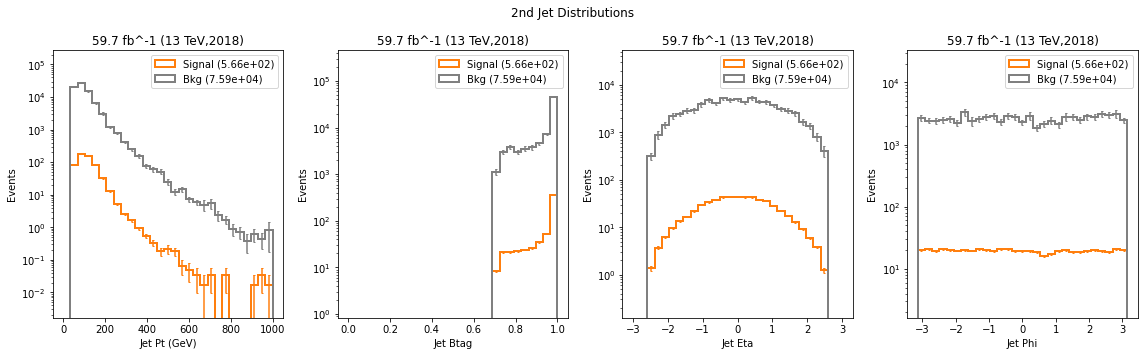

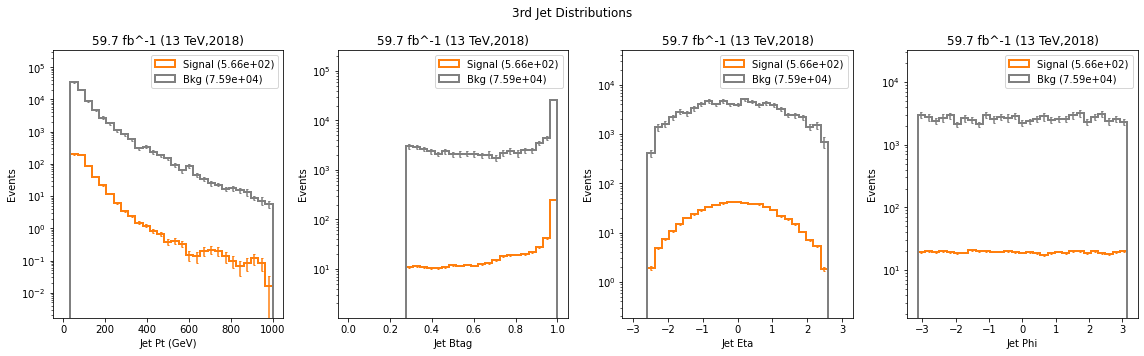

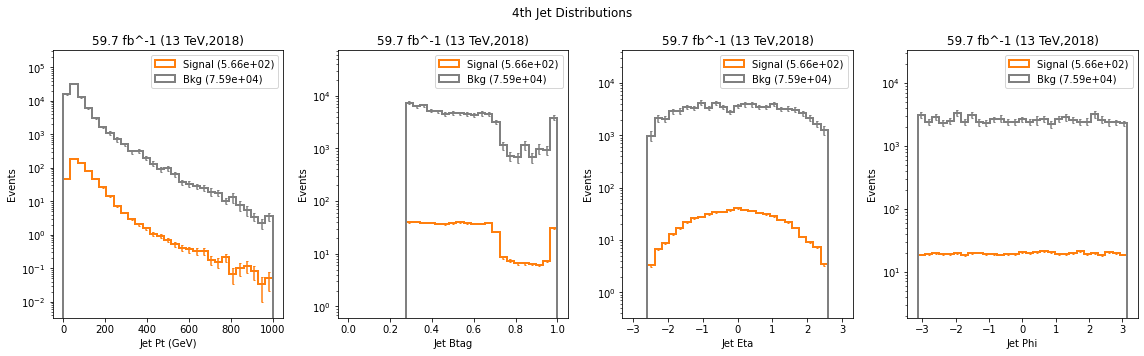

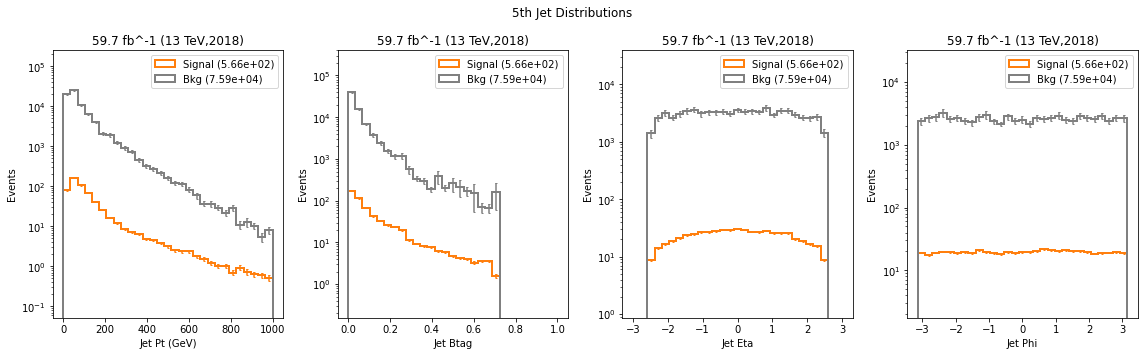

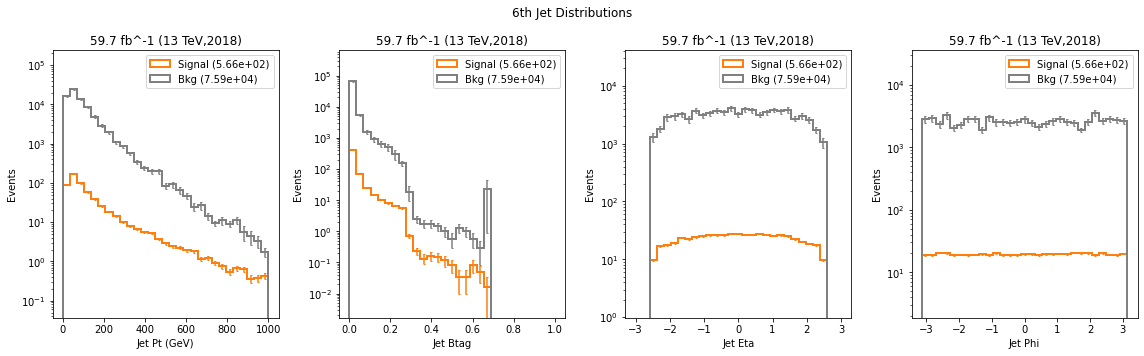

In [11]:
study.ijets(hm_cr_btagsum,log=1,saveas="hm_btagsum_cr")